# We will do this tas using three types of clustering i.e. DBSCAN,Hierarchical clustering and kmean clustering

In [1]:
#import hierarchycal clustering libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch # to draw dendrogram
from sklearn.cluster import AgglomerativeClustering # for model building using Hierarchical Clustering
from sklearn.cluster import KMeans # for model nuilding using kmeans clustering
from sklearn.cluster import DBSCAN

In [2]:
df = pd.read_excel("EastWestAirlines.xlsx", sheet_name = 'data')
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [3]:
#observe that this dataset has no null values.

# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [5]:
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [6]:
df.shape

(3999, 12)

In [7]:
#Normalisation function
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return(x)

In [8]:
df.iloc[:,1:]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [9]:
df_norm = norm_func(df.iloc[:,1:])
df_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


# Hierarchical Clustering

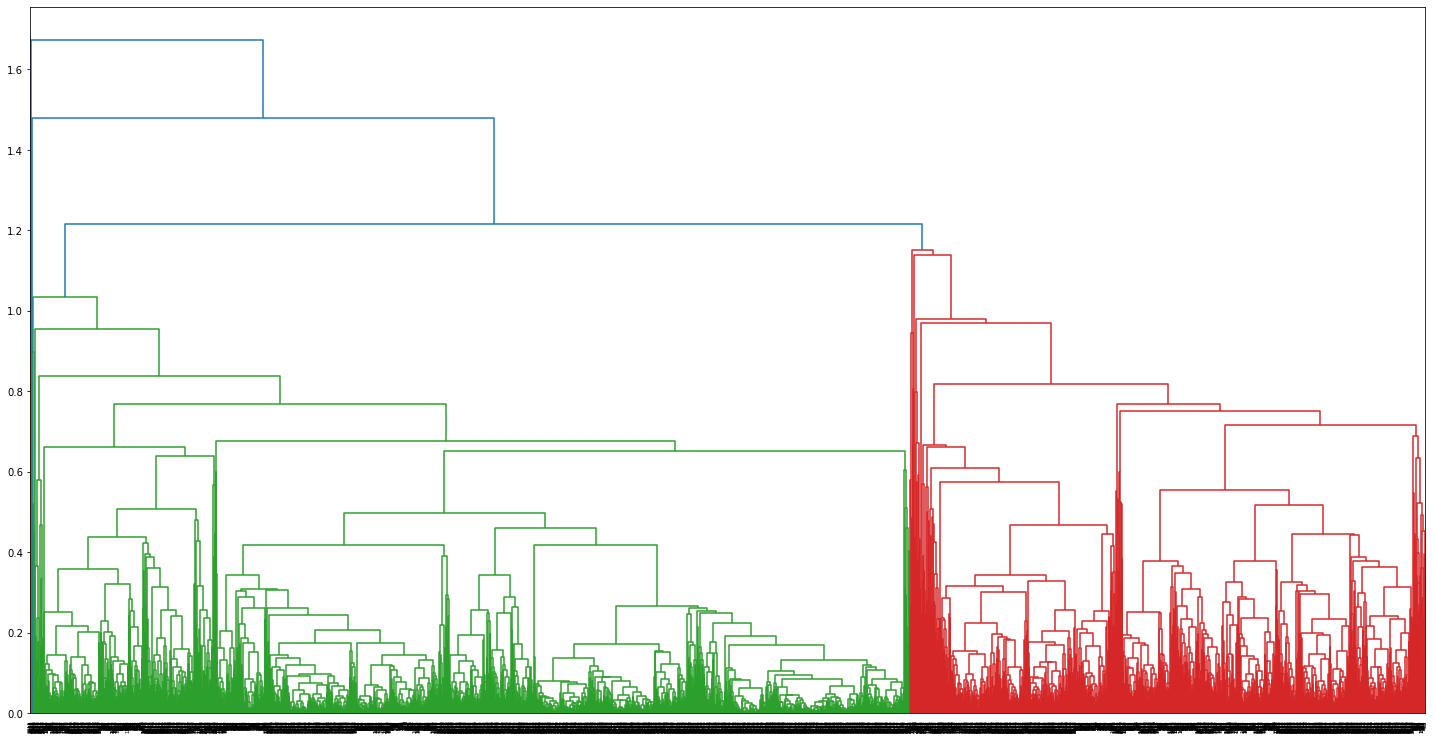

In [10]:
#create dendogram
plt.figure(figsize = (25,13))
dendogram = sch.dendrogram(sch.linkage(df_norm, method = 'average'))

In [11]:
#create clusters
hc = AgglomerativeClustering(n_clusters = 7,
                            affinity = 'euclidean',
                            linkage = 'average')

In [12]:
y_hc = hc.fit_predict(df_norm)
y_hc

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [13]:
Clusters = pd.DataFrame(y_hc,columns = ['Clusters'])
Clusters

,Clusters
0,1
1,1
2,1
3,1
4,0
...,...
3994,0
3995,0
3996,0
3997,1


In [14]:
df_norm['h_clusterid'] = Clusters
df_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0,1
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0,1
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0,1
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0,1
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0,0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0,0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0,0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0,1


In [15]:
df_norm.sort_values("h_clusterid")

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
1999,0.191881,0.130248,1.0,0.0,0.0,0.371644,0.290698,0.011357,0.056604,0.535086,1.0,0
3158,0.076187,0.000000,0.0,0.0,0.0,0.101674,0.116279,0.026284,0.056604,0.309139,1.0,0
1501,0.031743,0.165590,0.5,0.0,0.0,0.132723,0.162791,0.000000,0.000000,0.584278,1.0,0
1500,0.069907,0.131593,0.0,0.0,0.0,0.035175,0.232558,0.042185,0.113208,0.561249,1.0,0
1498,0.041691,0.089702,0.0,0.0,0.0,0.037924,0.011628,0.000000,0.000000,0.580902,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
151,0.545747,0.000000,1.0,0.0,0.0,0.801274,0.209302,0.073012,0.113208,0.920907,1.0,6
190,0.072450,0.000000,1.0,0.0,0.0,0.912240,0.360465,0.016225,0.037736,0.904871,1.0,6
3883,0.074005,0.000000,1.0,0.0,0.0,0.721164,0.174419,0.000000,0.000000,0.194116,1.0,6
126,0.353150,0.000000,1.0,0.0,0.0,0.738582,0.302326,0.073012,0.188679,0.922354,1.0,6


In [16]:
df["h_clusterid"] = Clusters
df.sort_values("h_clusterid")

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
1999,2016,327126,1452,5,1,1,97997,25,350,3,4440,1,0
3158,3180,129887,0,1,1,1,26810,10,810,3,2566,1,0
1501,1516,54116,1846,3,1,1,34997,14,0,0,4848,1,0
1500,1515,119180,1467,1,1,1,9275,20,1300,6,4657,1,0
1498,1513,71076,1000,1,1,1,10000,1,0,0,4820,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,154,930410,0,5,1,1,211284,18,2250,6,7640,1,6
190,194,123516,0,5,1,1,240544,31,500,2,7507,1,6
3883,3906,126167,0,5,1,1,190160,15,0,0,1612,1,6
126,129,602064,0,5,1,1,194753,26,2250,10,7652,1,6


In [17]:
df.groupby('h_clusterid').mean()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
h_clusterid,,,,,,,,,,,,
0,1748.752394,9.470821e+04,241.560192,2.647059,1.015732,1.000684,27548.586183,15.493844,797.608071,2.446648,4620.122435,1.0
1,2173.442851,5.939376e+04,87.846675,1.701712,1.013939,1.000796,10062.361211,9.097172,225.808045,0.651135,3820.078455,0.0
2,2075.000000,2.083429e+05,0.000000,3.000000,1.000000,3.857143,69533.142857,25.571429,400.000000,1.142857,4026.428571,0.0
3,3128.000000,1.319995e+05,347.000000,2.500000,1.000000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000,1.0
4,1306.000000,7.656512e+04,147.750000,3.875000,1.000000,4.250000,115273.250000,30.250000,600.000000,2.000000,5127.875000,1.0
5,279.000000,1.704838e+06,0.000000,1.000000,1.000000,1.000000,17108.000000,32.000000,4823.000000,23.000000,7283.000000,1.0
6,884.666667,4.044688e+05,0.000000,5.000000,1.000000,1.000000,221842.500000,28.500000,2398.833333,6.166667,6331.833333,1.0


In [18]:
df['h_clusterid'].value_counts()

1    2511
0    1462
4       8
2       7
6       6
3       4
5       1
Name: h_clusterid, dtype: int64

# Using K Means Clustering

In [19]:
df_kmeans = df_norm.drop(columns = 'h_clusterid')
df_kmeans

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


In [20]:
kmeans = KMeans(n_clusters = 10, random_state = 0)
kmeans.fit(df_kmeans)

KMeans(n_clusters=10, random_state=0)

In [21]:
kmeans.inertia_

226.10985005073977

In [22]:
from sklearn.metrics import silhouette_score,calinski_harabasz_score
sil_score = []
wcss = []
cal_haz_score = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i ,random_state = 0)
    kmeans.fit(df_kmeans)
    wcss.append(kmeans.inertia_)
    if i==1:
        continue
    sil_score.append(silhouette_score(df_kmeans,kmeans.labels_))
    cal_haz_score.append(calinski_harabasz_score(df_kmeans,kmeans.labels_))

In [23]:
wcss

[1830.7932128584116,
 823.6756984125205,
 625.168488157072,
 436.71719004195586,
 348.9433217254137,
 319.0111513821079,
 287.72955346517983,
 263.2142998913928,
 243.92574880337364,
 226.10985005073977]

In [24]:
sil_score

[0.535930510919477,
 0.4648452938858305,
 0.4744941579482721,
 0.44306720727960347,
 0.38865859989228385,
 0.3909601011818369,
 0.3803016589624793,
 0.3842538055607832,
 0.34523029131540034]

In [25]:
cal_haz_score

[4887.1767286548775,
 3853.1023965303593,
 4250.907939313227,
 4240.307878597627,
 3784.5358980848728,
 3568.1178505371004,
 3395.499107019209,
 3244.6355154388852,
 3145.513999211974]

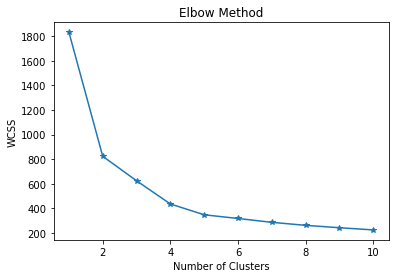

In [26]:
plt.plot(range(1,11),wcss,'*-')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [27]:
#Selecting 5 number of cluster
k_clusterid = KMeans(n_clusters = 6,random_state=42)
k_clusterid.fit(df_kmeans)

KMeans(n_clusters=6, random_state=42)

In [28]:
k_clusterid.labels_

array([4, 4, 4, ..., 5, 0, 0])

In [29]:
#Assign Cluster to dataset
df['k_clusterid'] = k_clusterid.labels_
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid,k_clusterid
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1,4
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1,4
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1,4
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1,4
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0,2
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0,2
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0,5
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1,0


In [30]:
df.groupby('k_clusterid').mean()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
k_clusterid,,,,,,,,,,,,,
0,3204.917636,33097.301357,94.131783,1.070736,1.016473,1.006783,3244.520349,6.173450,212.850775,0.603682,1992.402132,0.0,1.001938
1,834.261072,142738.529138,227.340326,4.242424,1.002331,1.037296,56482.144522,21.400932,840.319347,2.510490,6244.319347,1.0,0.123543
2,1904.763744,83529.153046,290.453195,1.156018,1.032689,1.008915,8850.395245,10.476969,1030.112927,3.148588,4338.867756,1.0,0.028232
3,1840.462783,118297.325243,73.467638,3.584142,1.001618,1.022654,31384.393204,17.233010,224.100324,0.627832,4419.553398,0.0,1.008091
4,1183.362903,49921.633641,89.903226,1.122120,1.019585,1.001152,3467.074885,6.913594,243.834101,0.728111,5567.925115,0.0,1.000000
5,2494.509235,69355.197889,165.506596,3.546174,1.000000,1.013193,33302.804749,18.844327,570.437995,1.725594,3300.385224,1.0,0.034301


In [31]:
df['k_clusterid'].value_counts()

0    1032
4     868
2     673
3     618
1     429
5     379
Name: k_clusterid, dtype: int64

# Using DBSCAN

<AxesSubplot:>

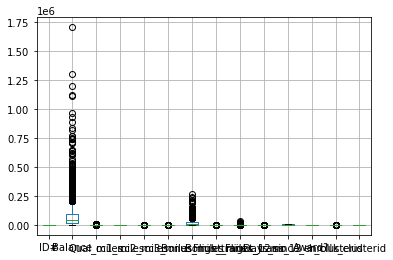

In [32]:
df.boxplot()

In [33]:
df_DB = df_norm.drop(columns = 'h_clusterid')
df_DB

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


In [34]:
my_array = df_norm.values
my_array
#we need  standardised values in array form in order to apply DBSCAN

array([[0.01650773, 0.        , 0.        , ..., 0.84374246, 0.        ,
        1.        ],
       [0.01128788, 0.        , 0.        , ..., 0.83988425, 0.        ,
        1.        ],
       [0.02425685, 0.        , 0.        , ..., 0.84784181, 0.        ,
        1.        ],
       ...,
       [0.0431695 , 0.        , 0.5       , ..., 0.16879672, 1.        ,
        0.        ],
       [0.03220189, 0.        , 0.        , ..., 0.16867615, 0.        ,
        1.        ],
       [0.00176908, 0.        , 0.        , ..., 0.16831444, 0.        ,
        1.        ]])

In [35]:
#if i increase the value of eps then many points will be kept in the sam cluster and if i decrese the value of eps then many
#noise point will be created. they are hyperparameters
dbscan = DBSCAN(eps = 0.4, min_samples = 3)
dbscan.fit(my_array)
#you cannot take min_samples =5 ?

DBSCAN(eps=0.4, min_samples=3)

In [36]:
#Noisy samples are given the label -1.
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [38]:
#Assign Cluster to dataset
df['D_clusterid'] = dbscan.labels_
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid,k_clusterid,D_clusterid
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1,4,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1,4,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1,4,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1,4,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0,2,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0,2,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0,5,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1,0,0


In [39]:
df['D_clusterid'].value_counts()

 0    2485
 1    1440
-1      20
 7      16
 4      10
 5       9
 2       5
 3       5
 6       5
 8       4
Name: D_clusterid, dtype: int64

In [ ]:
df[df['D_clusterid'] == -1]
#this is noise point